<h1><center>Prediction of online payment fraud using classification methods</center></h1>


#Background

###Purpose of this project
* Developing a model that predicts and identifies fraudulent online payments.

Payment fraud is the illicit act of using someone else's payment information without their authorization to make unauthorized transactions or purchases, and fraud detection is the process of identifying whether a transaction is fraudulent or not. Payment fraud is a significant concern in today's digital era, as “Fraudulent activities can lead to financial losses, reputational damage, legal consequences, operational disruptions, loss of business opportunities, personal and financial data breaches, and non-compliance with regulations” (Admin, 2023).


###Different types of payment of fraud
Unauthorized Card Usage: This occurs when an individual steals physical payment cards, like credit or debit cards, and utilizes them for fraudulent transactions before the cardholder realizes their card is missing.
Card Skimming: This occurs when fraudsters obtain someone's credit card information and use it to make unauthorized transactions or purchases. Fraudsters employ skimming devices to illegally capture card data at ATMs, payment terminals, or other card readers.
Phishing: Criminals send deceptive emails, and messages, or make fraudulent phone calls impersonating legitimate entities to trick individuals into divulging their payment details. They may also create counterfeit websites to obtain sensitive data.
Data Breaches: Large-scale breaches of data systems can expose stored payment information held by businesses or financial institutions. Hackers then employ the stolen data to initiate fraudulent transactions or sell it on the black market.
Identity Theft: I think everyone knows identity theft but it is the cases where fraudsters acquire an individual's personal information, including payment details, to assume their identity and make unauthorized payments or establish fraudulent accounts.
Online Payment Fraud: Fraudulent transactions occur in e-commerce settings where criminals exploit stolen payment information to make online purchases without the knowledge or consent of the legitimate cardholder.


###Why predict fraud records?
As mentioned before, payment fraud has become a significant concern in today's society, and the detection of these fraudulent payments has become crucial. But what are the Benefits of Fraud Detection for Organisations? Fraud.com published an article called “What is Fraud Detection and why is it needed?” And in a section explained why it is important for organizations.
Reduced losses from fraud: Fraud detection can help organizations to identify and prevent fraud before it occurs, minimizing losses from fraudulent activity.
Improved reputation:  Organisations taking steps to detect and prevent fraud are likely to have a better reputation with customers and the general public, and less customer friction overall.
Greater security:  Fraud detection can help organizations to improve their security by identifying potential security risks and taking steps to mitigate them.
Improved decision-making:  Organisations that can detect and prevent fraud are likely to be able to make better decisions about how to allocate resources and manage risks. (International, 2023)

The Federal Trade Commission (FTC) published an article about reports in 2020 that stated the FTC “received more than 4.7 million reports in 2020”  and “The Federal Trade Commission received more than 2.1 million fraud reports from consumers in 2020” (Ritchie & Staff in the Bureau of Competition & Office of Technology, 2021).
A report was published by PricewaterhouseCoopers (PwC) analyzing a survey done in 2020 called the PwC’s Global Economic Crime and Fraud Survey 2022 which surveyed 1,296 executives across 53 countries. It states that “51% of surveyed organizations say they experienced fraud in the past two years, the highest level in our 20 years of research.” and “40% of those organizations encountering fraud experienced platform fraud” (PricewaterhouseCoopers, n.d.).


#Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
#data = pd.read_csv('/content/onlinefraud.csv')
data = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

In [ ]:
fraud = data.copy()

In [ ]:
fraud.shape

(6362620, 11)

In [ ]:
fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
fraud.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [ ]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
fraud.duplicated().sum()

0

In [ ]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Text(0.5, 1.0, '% Fraud')

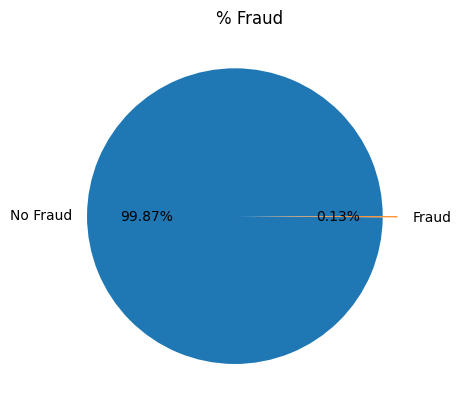

In [ ]:
forpie = fraud['isFraud'].value_counts()
label = ['No Fraud','Fraud']
plt.pie(forpie, labels = label , explode = (0.1, 0), autopct='%1.2f%%')
plt.title('% Fraud')

In [ ]:
fraud_type = fraud[(fraud['isFraud']==1) | (fraud['isFlaggedFraud']==1)]['type'].unique()
print(f"The types of transactions is fraudulent are {fraud_type}")

The types of transactions is fraudulent are ['TRANSFER' 'CASH_OUT']


Text(0.5, 1.0, '% Fraud from the TRANSFER and CASH_OUT type')

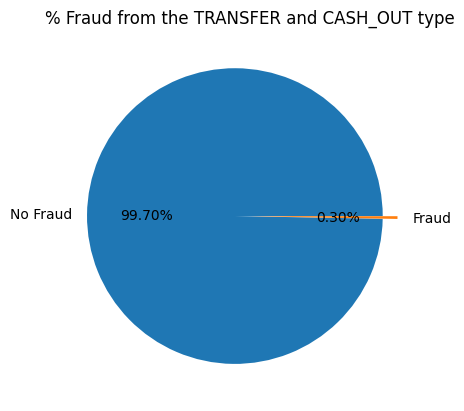

In [ ]:
fraudTrCO = fraud[(fraud['type'].isin(['TRANSFER','CASH_OUT']))]
Fraud = fraud[(fraud['type'].isin(['TRANSFER','CASH_OUT']))]

forpie = fraudTrCO['isFraud'].value_counts()
label = ['No Fraud','Fraud']
plt.pie(forpie, labels = label , explode = (0.1, 0), autopct='%1.2f%%')
plt.title('% Fraud from the TRANSFER and CASH_OUT type')

<ipython-input-14-09d5c6e2cc48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fraud.corr().round(4)


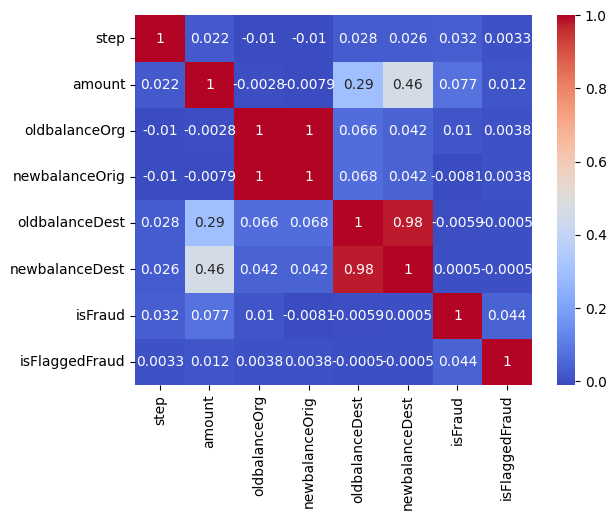

In [ ]:
correlation_matrix = fraud.corr().round(4)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show();



In [ ]:
Fraud[Fraud['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
Fraud[(Fraud['isFraud']==0) & (Fraud['isFlaggedFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
Fraud.drop(["isFlaggedFraud"], axis=1, inplace=True)

<ipython-input-17-f2e03bb213b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fraud.drop(["isFlaggedFraud"], axis=1, inplace=True)


In [ ]:
Fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0


In [ ]:
fraud_type3 = fraud[(fraud['isFraud']==1) | (fraud['isFlaggedFraud']==1)]['nameOrig'].unique()
print(f"The nameOrig that are fraudulent are {fraud_type3}")

The nameOrig that are fraudulent are ['C1305486145' 'C840083671' 'C1420196421' ... 'C1162922333' 'C1685995037'
 'C1280323807']


In [ ]:
fraud_type4 = fraud[(fraud['isFraud']==1) | (fraud['isFlaggedFraud']==1)]['nameDest'].unique()
print(f"The nameDest that are fraudulent are {fraud_type4}")

The nameDest that are fraudulent are ['C553264065' 'C38997010' 'C972765878' ... 'C1365125890' 'C2080388513'
 'C873221189']


In [ ]:
Fraud.drop(["nameOrig"], axis=1, inplace=True)

<ipython-input-21-3ae191037f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fraud.drop(["nameOrig"], axis=1, inplace=True)


In [ ]:
Fraud.drop(["nameDest"], axis=1, inplace=True)

<ipython-input-22-205f2660c8f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fraud.drop(["nameDest"], axis=1, inplace=True)


In [ ]:
Fraud.head(100)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,0.0,0.0,1442298.03,22190.99,0
196,1,CASH_OUT,36437.06,0.0,0.0,154606.00,1363368.51,0
197,1,CASH_OUT,82691.56,0.0,0.0,657983.89,6453430.91,0
198,1,CASH_OUT,338767.10,0.0,0.0,544481.28,3461666.05,0


In [ ]:
fraud_type6 = fraud[(fraud['isFraud']==1) | (fraud['isFlaggedFraud']==1)]['newbalanceDest'].unique()
fraud_type6_series = pd.Series(fraud_type6)

with pd.option_context('display.max_rows', None):
    print(f"The amounts of newbalanceDest that are fraudulent are:\n{fraud_type6_series.to_string(index=False)}")

The amounts of newbalanceDest that are fraudulent are:
        0.00
    12145.85
  9291619.62
  2444985.19
     7550.03
    34155.22
   132842.64
   235238.66
  1096187.24
  1095914.71
    33111.63
   165878.60
    10539.37
    22877.00
  9941904.21
  6963508.84
   169941.73
    13707.11
    86070.17
   120074.73
 13071229.35
    10119.47
    28041.27
   128744.50
    30521.02
    48630.50
   101717.84
    17246.00
    24380.72
    10224.00
    10612.55
  1658746.09
   143675.35
   438233.86
  9281535.44
    71140.30
   184477.77
   267095.19
   171647.35
     4555.92
   970749.68
  1158662.90
   582265.81
   302550.56
  1184633.07
  1794033.65
   261290.69
  1842864.22
   141302.12
   189441.24
    10872.90
  1965587.60
  2046918.80
   665743.67
   338538.16
   315315.76
   277970.88
  4189858.81
   533074.88
  2930405.33
    96795.60
     9217.19
   114612.48
  3217683.65
    97980.88
  1029922.17
    40425.11
    19472.00
  5811064.07
  1094377.39
    81209.81
  3098566.67
   193838

In [ ]:
fraud_counts2 = fraud[(fraud['isFraud'] == 1) | (fraud['isFlaggedFraud'] == 1)]['newbalanceDest'].value_counts().reset_index()
fraud_counts2.columns = ['Amounts', 'Count']

# Add the value 0.0 to the DataFrame if it does not exist
if 0.0 not in fraud_counts2['Amounts'].values:
    fraud_counts2 = fraud_counts2.append({'Amounts': 0.0, 'Count': 0}, ignore_index=True)

with pd.option_context('display.max_rows', None):
    print(f"The amounts of newbalanceDest that are fraudulent are:\n{fraud_counts2.to_string(index=False)}")

The amounts of newbalanceDest that are fraudulent are:
     Amounts  Count
        0.00   4091
 10000000.00     53
  1064995.85      2
   127905.82      2
  1165187.89      2
   429257.45      2
  1237834.66      1
  5942078.60      1
   379836.02      1
   326052.83      1
  5397564.49      1
  1132840.83      1
   934314.89      1
  7515624.63      1
   136278.86      1
   248783.65      1
  1189986.88      1
   260604.47      1
  1048388.34      1
  1927403.83      1
   422648.87      1
  4240628.09      1
  1126313.65      1
   674157.40      1
  1333325.43      1
  1379884.46      1
  2204980.95      1
  1910129.88      1
  3406533.80      1
  3372826.25      1
  1162559.12      1
   162192.78      1
  1214511.61      1
   934127.52      1
   367495.60      1
  1158655.16      1
   406203.60      1
   933527.51      1
   889130.97      1
   132438.82      1
  1293890.85      1
   964410.16      1
  1451083.08      1
   956320.77      1
    31248.99      1
  3666026.43      1
  757

In [ ]:
fraud_type7 = fraud[(fraud['isFraud']==1) | (fraud['isFlaggedFraud']==1)]['oldbalanceDest'].unique()
fraud_type7_series = pd.Series(fraud_type7)

with pd.option_context('display.max_rows', None):
    print(f"The amounts of oldbalanceDest that are fraudulent are:\n{fraud_type7_series.to_string(index=False)}")

The amounts of oldbalanceDest that are fraudulent are:
        0.00
    21182.00
    26202.00
     6268.00
      102.00
    31140.00
     9083.76
   132382.57
    18161.79
   147251.58
  3616012.10
 13010502.78
    31002.00
    98152.00
   101976.00
    10097.00
     6244.44
    36275.00
    11170.00
     3382.84
    19525.79
    27335.00
     4068.00
    30797.41
    98993.50
    11397.00
    24708.00
     2559.74
    21175.00
    10935.00
   660641.74
   894760.68
      968.00
   504667.31
   162222.00
  1929861.61
   194812.76
    75179.00
   255480.76
  4096048.05
    29669.00
    14165.62
   112512.48
  1283762.85
   688164.64
    27964.11
  1912955.54
    52730.33
   194510.24
    44170.11
   129917.80
     2979.00
   225127.62
   898297.85
   374803.26
    80136.56
   319036.02
   438199.37
   381607.21
   535933.16
   814654.61
    43962.42
  3471928.95
   366114.58
  4844060.13
   685636.21
   257758.48
  1274866.51
   413421.36
  5340917.82
    74371.00
  9142622.59
    57418

In [ ]:
fraud_counts3 = fraud[(fraud['isFraud'] == 1) | (fraud['isFlaggedFraud'] == 1)]['oldbalanceDest'].value_counts().reset_index()
fraud_counts3.columns = ['Amounts', 'Count']

# Add the value 0.0 to the DataFrame if it does not exist
if 0.0 not in fraud_counts3['Amounts'].values:
    fraud_counts3 = fraud_counts3.append({'Amounts': 0.0, 'Count': 0}, ignore_index=True)

with pd.option_context('display.max_rows', None):
    print(f"The amounts of oldbalanceDest that are fraudulent are:\n{fraud_counts3.to_string(index=False)}")

The amounts of oldbalanceDest that are fraudulent are:
     Amounts  Count
        0.00   5351
   386985.85      1
   716857.20      1
  8682013.45      1
     6493.14      1
    38222.61      1
  4906677.40      1
  1108375.76      1
   352139.13      1
    33769.18      1
  1031759.71      1
    29150.70      1
    70857.67      1
   256363.03      1
   599102.39      1
    20017.88      1
   224957.93      1
    68292.18      1
   257056.52      1
  1624593.89      1
   528616.61      1
    17821.53      1
  1620065.35      1
     5930.71      1
   918489.62      1
   470854.17      1
   934700.52      1
   129269.88      1
   139582.33      1
   673285.12      1
   850226.66      1
   234543.30      1
   668223.65      1
     6866.91      1
  3978784.16      1
   177670.78      1
  3279840.64      1
   340510.43      1
    25595.60      1
  1575093.13      1
   299999.02      1
  9062662.62      1
  2758109.87      1
  3380917.08      1
   102876.20      1
   244746.61      1
   22

This is around the same as we have seen from the last ones


In [ ]:
newbalance_orig = fraud['newbalanceOrig']

# Get the unique amounts and their counts
amount_counts = newbalance_orig.value_counts().reset_index()

# Rename the columns
amount_counts.columns = ['Amount', 'Count']

# Display the amounts and their counts
with pd.option_context('display.max_rows', None):
    print(amount_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
X=fraud.loc[(fraud.type=='TRANSFER')|(fraud.type=='CASH_OUT')]
y=X['isFraud']

In [ ]:
X['type']=X['type'].map({'TRANSFER':0,'CASH_OUT':1})

<ipython-input-30-c43ae3f73d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type']=X['type'].map({'TRANSFER':0,'CASH_OUT':1})


In [ ]:
X[(X['newbalanceOrig']==0)&(X['newbalanceDest']==0)].shape

(14100, 11)

In [ ]:
(X[(X['newbalanceDest']==0)&(X['oldbalanceDest']==0)&(X['isFraud']==1)&(X['amount']>0)].shape[0])/(X[X['isFraud']==1].shape[0])

0.4955558261293072

In [ ]:
(X[(X['newbalanceDest']==0)&(X['oldbalanceDest']==0)&(X['isFraud']==0)&(X['amount']>0)].shape[0])/(X[X['isFraud']==0].shape[0])

0.0006176245277308345

I also suggest cleaning the data by completely getting rid of name data both nameOrig and nameDest as they don't matter.  Also getting rid of isflaggedFraud and isFraud as those are also not needed to do prediction for right now.

#Data Preparation

###One Hot Encoding

In [ ]:
fraud_OHE = pd.get_dummies(fraud['type'])
fraud_OHE.head(100)
fraud = fraud.drop(["isFlaggedFraud",'nameOrig','nameDest','type'],1)

<ipython-input-34-50a37dddf5f5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fraud = fraud.drop(["isFlaggedFraud",'nameOrig','nameDest','type'],1)


In [ ]:
fraud_use = pd.concat([fraud,fraud_OHE],axis=1)
fraud_use.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


#Model analysis

##Original Dataset

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X = fraud_use.drop(['isFraud'],1)
y = fraud_use['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-37-68a4dab91f92>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = fraud_use.drop(['isFraud'],1)


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

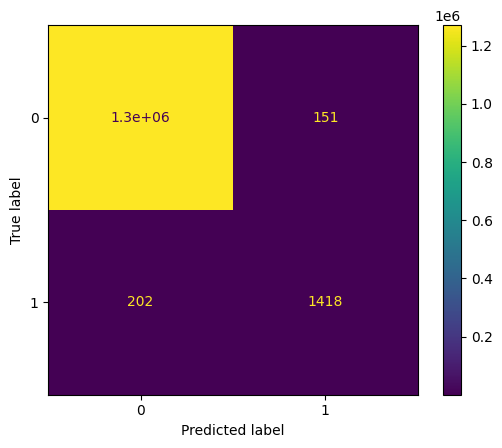

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9997
Precision: 0.9038
Recall: 0.8753
F1-score: 0.8893


In [ ]:
og_dt = [accuracy, precision, recall,f1]

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[1270753     151]
 [    202    1418]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
ly_pred = log_reg.predict(X_test)

In [ ]:
laccuracy = accuracy_score(y_test, ly_pred)
lprecision = precision_score(y_test, ly_pred)
lrecall = recall_score(y_test, ly_pred)
lf1 = f1_score(y_test, ly_pred)
print(f"Accuracy: {laccuracy:.4f}")
print(f"Precision: {lprecision:.4f}")
print(f"Recall: {lrecall:.4f}")
print(f"F1-score: {lf1:.4f}")

Accuracy: 0.9983
Precision: 0.3592
Recall: 0.4148
F1-score: 0.3850


In [ ]:
og_lr = [laccuracy, lprecision, lrecall, lf1]

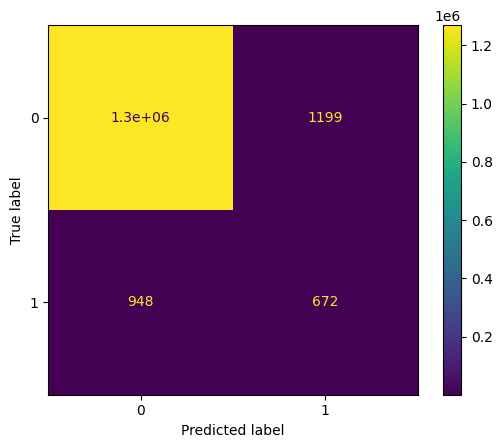

In [ ]:
cm = confusion_matrix(y_test, ly_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

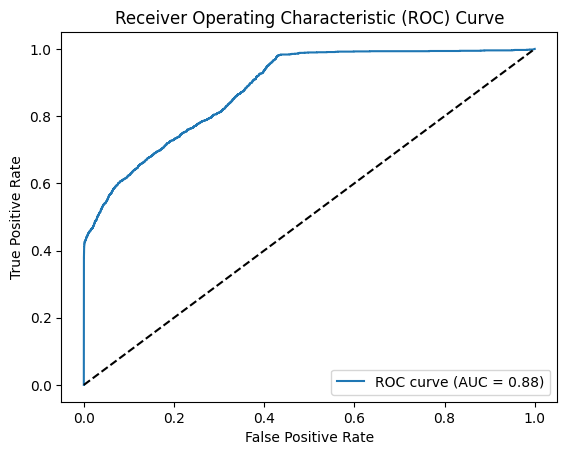

In [ ]:
probas = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

###Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

randomforest basically consists of multiple decision trees and by adding randomness to the data, it adds some regularization effect to the model. Theoretically, it should reach better performance that simple decision trees

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
rf_pred = rf.predict(X_test)

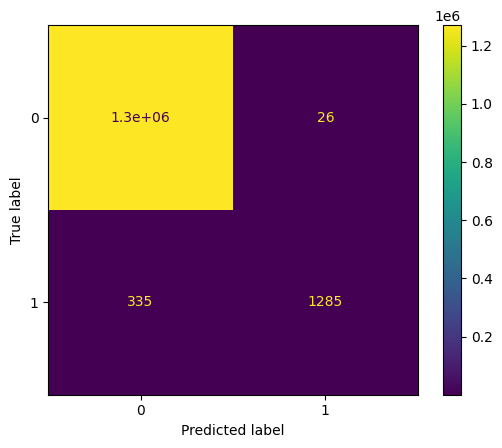

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
rfaccuracy = accuracy_score(y_test, rf_pred)
rfprecision = precision_score(y_test, rf_pred)
rfrecall = recall_score(y_test, rf_pred)
rff1 = f1_score(y_test, rf_pred)
print(f"Accuracy: {rfaccuracy:.4f}")
print(f"Precision: {rfprecision:.4f}")
print(f"Recall: {rfrecall:.4f}")
print(f"F1-score: {rff1:.4f}")

Accuracy: 0.9997
Precision: 0.9802
Recall: 0.7932
F1-score: 0.8768


In [ ]:
og_rf = [rfaccuracy, rfprecision, rfrecall, rff1]

Acuracy of all the models are above 99%, making the comparison meaningless. Recall the distribution the fraud/not fraud cases are 0.13% and 99.87%. Basically, the classifier can reach very high performance by predicting all the cases as fraud. Therefore, we should resample the data to get a more valuable result.

##Undersampled dataset
- Accuracy score for previous models are 1.00, meaning that imbalanced dataset might affect the training of our model
- We conduct random undersampling to reduce data points since data set is big and make dataset more balanced
- We balance our dataset to have less rows of data and more data from the minority fraud cla

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus5 = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
X_train.shape

(5090096, 11)

<BarContainer object of 2 artists>

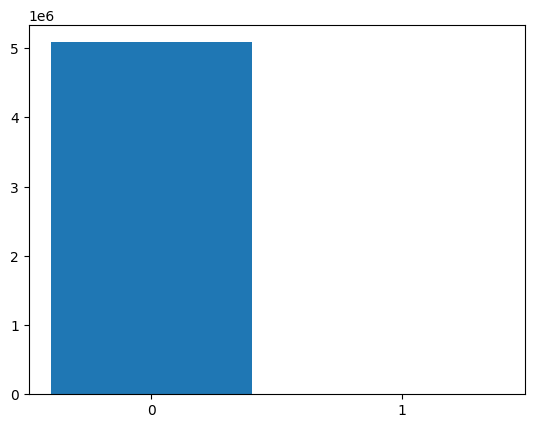

In [ ]:
plt.bar(["0","1"],y_train.value_counts())

In [ ]:
X_res, y_res = rus5.fit_resample(X_train, y_train)

In [ ]:
X_res.shape

(19779, 11)

<BarContainer object of 2 artists>

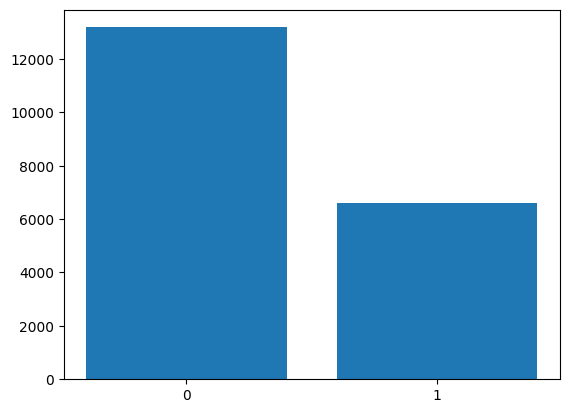

In [ ]:
plt.bar(["0","1"],y_res.value_counts())

Text(0.5, 1.0, '% Fraud')

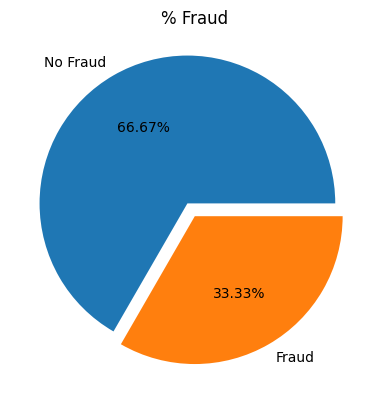

In [ ]:
forpie = y_res.value_counts()
label = ['No Fraud','Fraud']
plt.pie(forpie, labels = label , explode = (0.1, 0), autopct='%1.2f%%')
plt.title('% Fraud')

Text(0.5, 1.0, '% Fraud')

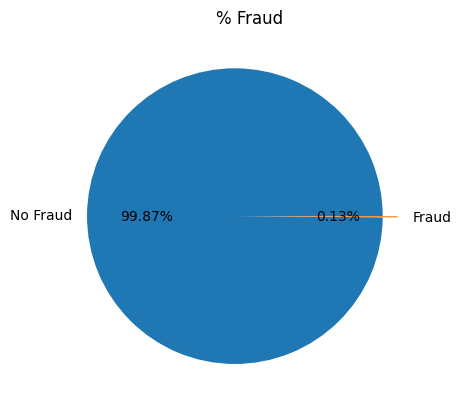

In [ ]:
forpie = y_train.value_counts()
label = ['No Fraud','Fraud']
plt.pie(forpie, labels = label , explode = (0.1, 0), autopct='%1.2f%%')
plt.title('% Fraud')

After undersampling, our data is smaller with 19779 rows, we can use this to do model selection and parameter tuning more efficiently.
<br> 19779 rows is also enough.


###Decision Tree

In [ ]:
dt_res = DecisionTreeClassifier(random_state=42)
dt_res.fit(X_res, y_res)

DecisionTreeClassifier(random_state=42)

In [ ]:
yres_pred = dt_res.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, yres_pred):.4f}")
print(f"Precision: {precision_score(y_test, yres_pred):.4f}")
print(f"Recall: {recall_score(y_test, yres_pred):.4f}")
print(f"F1-score: {f1_score(y_test, yres_pred):.4f}")

Accuracy: 0.9924
Precision: 0.1427
Recall: 0.9932
F1-score: 0.2496


In [ ]:
re_dt = [accuracy_score(y_test, yres_pred),precision_score(y_test, yres_pred),recall_score(y_test, yres_pred),f1_score(y_test, yres_pred)]

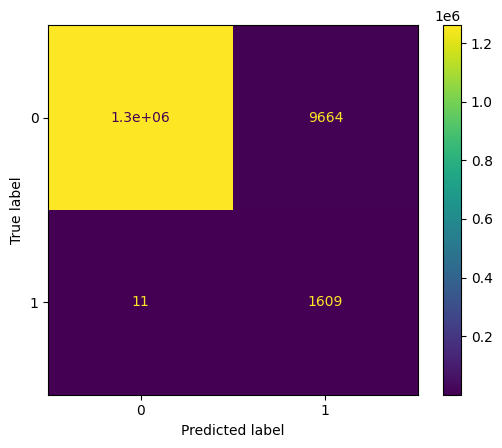

In [ ]:
cm = confusion_matrix(y_test, yres_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
for name, importance in zip(X_res.columns, dt_res.feature_importances_):
    print(name, importance)

step 0.027259072299714023
amount 0.1408706203198271
oldbalanceOrg 0.30627208623586677
newbalanceOrig 0.43440282227431504
oldbalanceDest 0.0034611800488233164
newbalanceDest 0.04909738985572928
CASH_IN 0.0
CASH_OUT 0.0034489988836019425
DEBIT 0.0004267200792166576
PAYMENT 0.024565960990459303
TRANSFER 0.01019514901244662


Precision score has lowered significantly after undersampling from 0.90. With an undersampled data, we have more false positives which means our fraud detection is more conservative. Recall increases from 0.88 to 0.99 which means that our model performs a lot better after undersampling and we are able to capture and detect most frauds in the test dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
        'max_depth': [10, 50, 100, None],
        'min_samples_leaf': [1, 2, 4,8, 16, 32],
        'min_samples_split': [2, 10, 50, 100]
}

In [ ]:
dt_res_gs = DecisionTreeClassifier(random_state=312)
grid_search_res = GridSearchCV(dt_res_gs, param_grid, cv=5, scoring='precision')

In [ ]:
grid_search_res.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=312),
             param_grid={'max_depth': [10, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32],
                         'min_samples_split': [2, 10, 50, 100]},
             scoring='precision')

In [ ]:
print("Best Parameters: ", grid_search_res.best_params_)
print("Best F1 Score: ", grid_search_res.best_score_)

Best Parameters:  {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best F1 Score:  0.9864977603969978


In [ ]:
dt_res_best = grid_search_res.best_estimator_
dt_res_best.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       random_state=312)

In [ ]:
y_pred_res_gs = dt_res_best.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_res_gs):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_res_gs):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_res_gs):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_res_gs):.4f}")

Accuracy: 0.9922
Precision: 0.1398
Recall: 0.9932
F1-score: 0.2451


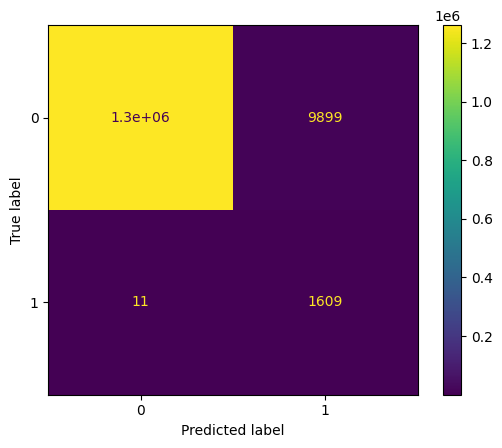

In [ ]:
cm = confusion_matrix(y_test, y_pred_res_gs)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
for name, importance in zip(X_res.columns, dt_res_best.feature_importances_):
    print(name, importance)

step 0.027234796452550447
amount 0.14059929905892796
oldbalanceOrg 0.3062013367238492
newbalanceOrig 0.4379341732275099
oldbalanceDest 0.002166837655653329
newbalanceDest 0.04708156964948521
CASH_IN 0.0
CASH_OUT 0.004382345985834084
DEBIT 0.00043018897555255104
PAYMENT 0.024765662800188857
TRANSFER 0.009203789470448608


###Logistic Regression

In [ ]:
log_reg_res = LogisticRegression()
log_reg_res.fit(X_res, y_res)

LogisticRegression()

In [ ]:
lres_y_pred = log_reg_res.predict(X_test)

In [ ]:
rlaccuracy = accuracy_score(y_test, lres_y_pred)
rlprecision = precision_score(y_test, lres_y_pred)
rlrecall = recall_score(y_test, lres_y_pred)
rlf1 = f1_score(y_test, lres_y_pred)
print(f"Accuracy: {rlaccuracy:.4f}")
print(f"Precision: {rlprecision:.4f}")
print(f"Recall: {rlrecall:.4f}")
print(f"F1-score: {rlf1:.4f}")

Accuracy: 0.9520
Precision: 0.0219
Recall: 0.8407
F1-score: 0.0427


In [ ]:
re_lr = [rlaccuracy,rlprecision,rlrecall,rlf1]

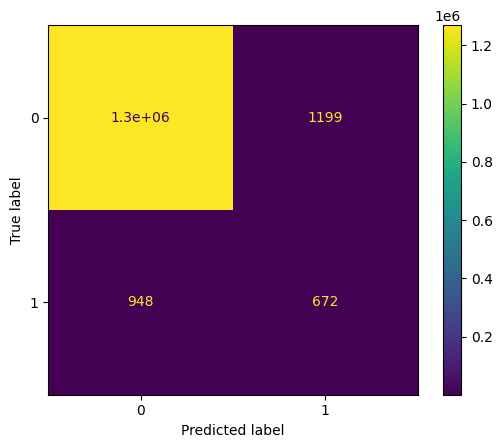

In [ ]:
cm = confusion_matrix(y_test, ly_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_res = RandomForestClassifier(random_state = 314)
rf_res.fit(X_res,y_res)

RandomForestClassifier(random_state=314)

In [ ]:
y_pred_res_rf = rf_res.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_res_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_res_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_res_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_res_rf):.4f}")

Accuracy: 0.9905
Precision: 0.1173
Recall: 0.9957
F1-score: 0.2099


In [ ]:
re_rf = [accuracy_score(y_test, y_pred_res_rf),precision_score(y_test, y_pred_res_rf),recall_score(y_test, y_pred_res_rf),f1_score(y_test, y_pred_res_rf)]

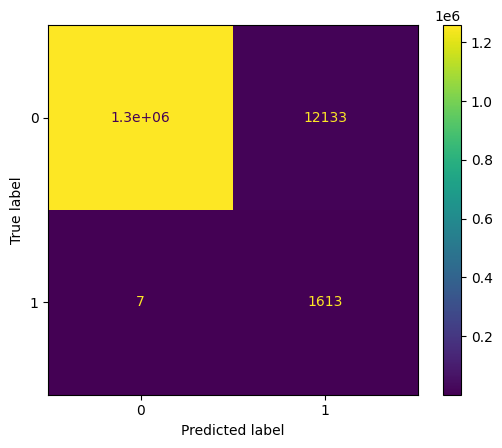

In [ ]:
cm = confusion_matrix(y_test, y_pred_res_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
for name, importance in zip(X_res.columns, rf_res.feature_importances_):
    print(name, importance)

step 0.08701723929514743
amount 0.17643057225102848
oldbalanceOrg 0.2687058608412267
newbalanceOrig 0.1491090240668418
oldbalanceDest 0.04377941946165983
newbalanceDest 0.07021253661363193
CASH_IN 0.0365304349074379
CASH_OUT 0.0320197384813298
DEBIT 0.00041222795738905983
PAYMENT 0.041135162638438506
TRANSFER 0.09464778348586854


##Comparison

### Decision Tree

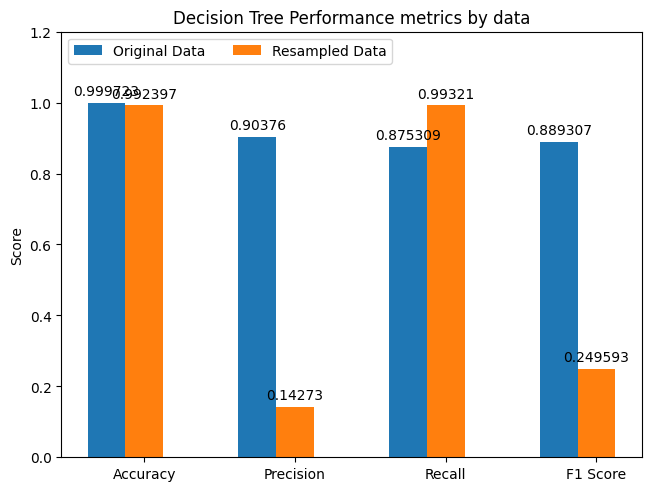

In [ ]:
metric = ("Accuracy","Precision","Recall","F1 Score")
score = {
    'Original Data': og_dt,
    'Resampled Data': re_dt}

x = np.arange(len(metric))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Score')
ax.set_title('Decision Tree Performance metrics by data')
ax.set_xticks(x + width, metric)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()


###Logistic Regression

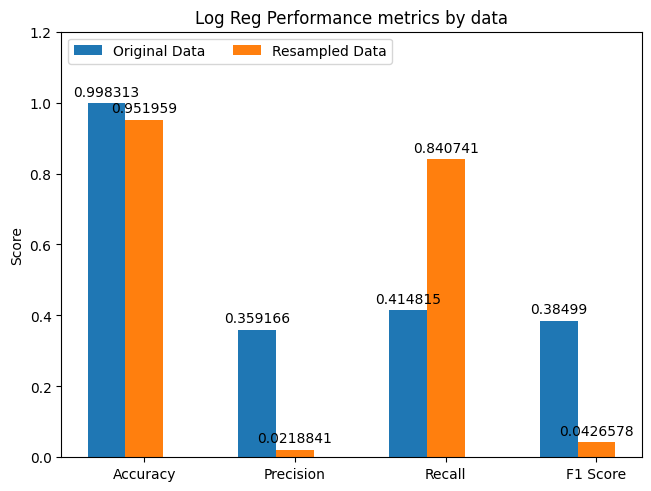

In [ ]:
metric = ("Accuracy","Precision","Recall","F1 Score")
score = {
    'Original Data': og_lr,
    'Resampled Data': re_lr}

x = np.arange(len(metric))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Score')
ax.set_title('Log Reg Performance metrics by data')
ax.set_xticks(x + width, metric)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()


### Random Forest

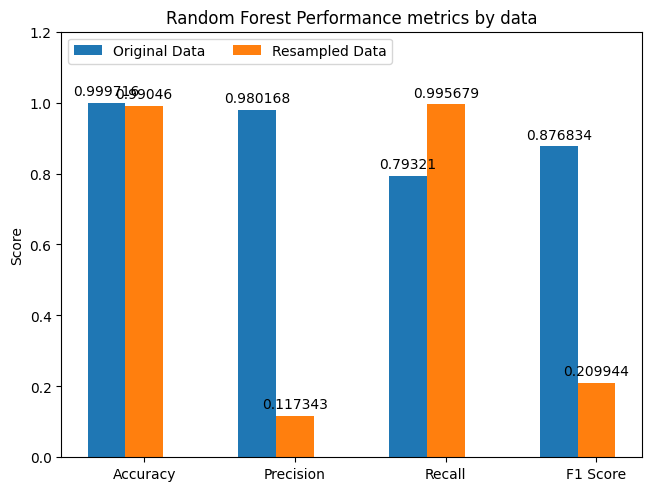

In [ ]:
metric = ("Accuracy","Precision","Recall","F1 Score")
score = {
    'Original Data': og_rf,
    'Resampled Data': re_rf}

x = np.arange(len(metric))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Score')
ax.set_title('Random Forest Performance metrics by data')
ax.set_xticks(x + width, metric)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()


Resampling reduces scores of metrics in general but increases recall scores for all models.
- Our models are now better able predict fraud albeit with lesser precision.
- Less frauds will go undetected with our new models

#Conclusion
* Best model based on F1 score is Decision Tree on original imbalanced data
* Best model based on Recall is Random Forest on undersampled data
* Best model based on Precision is Random Forest on original imbalanced data

Best way to predict online payment fraud ultimately depends on the payment companies’ priorities and cost involved if frauds goes undetected or cost of a transaction being wrongly predicted as fraud
* For fraud prediction, it is better to have more false positives than false negatives so frauds can be detected and reversed in time.
* However, if cost of verifying predicted fraud is high, too many false positives might not be ideal.


##Limitations and future study

- Big dataset of 6 million rows requires a lot of computational resources to do hyperparameter tuning like GridSearchCV
- Resampling helps to improve our model’s ability at detecting fraud
 - Undersampling removed most of the data from the majority class
- Use of other techniques to balance our data without losing useful information
 - Eg. SMOTE Synthetic Minority Oversampling TEchnique which uses k-nearest neighbour algorithm
- Explore the use of models that are more robust to imbalanced data so there is no need for resampling
 - XGBoost
 - Considering using weights in algorithms


#References

* PricewaterhouseCoopers. (n.d.). PWC’s Global Economic Crime and Fraud Survey 2022. PwC. https://www.pwc.com/gx/en/services/forensics/economic-crime-survey.html

* Admin. (2023, April 18). Preventing and stopping fraud in cross-border payments. AML Compliance & Fraud Prevention for Financial Institutions. https://blog.flagright.com/preventing-and-stopping-fraud-in-cross-border-payments

* Ritchie, J. N. & A., & Staff in the Bureau of Competition & Office of Technology. (2021, August 24). New Data Shows FTC received 2.2 million fraud reports from consumers in 2020. Federal Trade Commission. https://www.ftc.gov/news-events/news/press-releases/2021/02/new-data-shows-ftc-received-22-million-fraud-reports-consumers-2020

* International, F. (2023, January 23). What is fraud detection and why is it needed?. Fraud.com. https://www.fraud.com/post/fraud-detection

* Lopez-Rojas, E. (2017, April 3). Synthetic financial datasets for fraud detection. Kaggle. https://www.kaggle.com/datasets/ealaxi/paysim1
